# Project - Fake News Detection

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# DataFrame
true=pd.read_csv('true.csv')
fake=pd.read_csv('fake.csv')

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
true.shape
# 21417 rows and 4 columns

(21417, 4)

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake.shape
# 23481 rows and 4 columns

(23481, 4)

In [7]:
# Label data 
true['label'] = 1
fake['label'] = 0

In [8]:
# Combine the data true news and false news
data = [true.loc[:15000][:], fake.loc[:17000][:]]

In [9]:
# Make dataframe of data
df = pd.concat(data)

In [10]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
df.shape

(32002, 5)

### Check for null values

In [12]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

### Check for duplicate data

In [13]:
df.duplicated().sum()

178

In [14]:
# Drop duplicate value
df=df.drop_duplicates()
df.duplicated().sum()

0

### Randomly Shuffle rows

In [18]:
df=df.sample(frac = 1)

### Data Preprocessing

In [19]:
# Text Preprocessing
def wordopt(text):
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [20]:
df['text'] = df['text'].apply(wordopt)

In [21]:
df.head()

,title,text,subject,date,label
15948,DC Park Police Raid and Tear Down ‘Anti-Trump’...,Officials allegedly affiliated with the United...,Government News,"Sep 9, 2017",0
5257,No cuts to U.S. entitlement programs in Trump ...,WASHINGTON Reuters U S President Donald T...,politicsNews,"February 26, 2017",1
13127,BREAKING: RUBIO WINS GOP Senate Nomination In ...,Based on the number of supporters Trump is dra...,politics,"Aug 30, 2016",0
9185,Illinois governor vetoes $3.9 billion FY 2016 ...,CHICAGO Reuters Illinois Governor Bruce Ra...,politicsNews,"June 10, 2016",1
4510,"Trump's son-in-law, Kushner, flies into Iraq w...",BAGHDAD Reuters U S President Donald Trum...,politicsNews,"April 3, 2017",1


<Axes: >

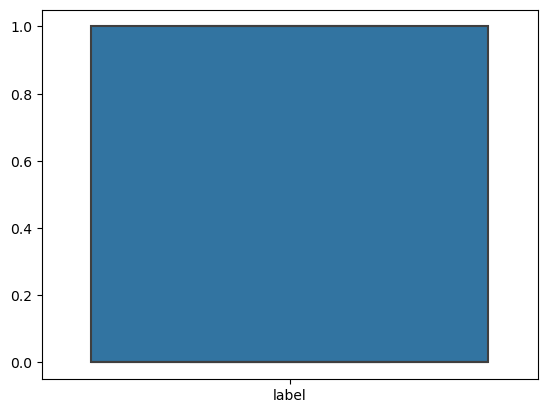

In [22]:
sns.boxplot(data=df)

#### Columns not having outliers. All data is normalize, in between 0 to 1.

In [23]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [24]:
df=df.drop(['title','subject','date'], axis = 1)

In [25]:
df.reset_index(inplace=True)
df.head()

,index,text,label
0,15948,Officials allegedly affiliated with the United...,0
1,5257,WASHINGTON Reuters U S President Donald T...,1
2,13127,Based on the number of supporters Trump is dra...,0
3,9185,CHICAGO Reuters Illinois Governor Bruce Ra...,1
4,4510,BAGHDAD Reuters U S President Donald Trum...,1


### Model Building

In [26]:
x = df['text']
y = df['label']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# Splitting the datas
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
pred_rf = RF.predict(xv_test)

In [32]:
RF.score(xv_test, y_test)

0.9879336349924586

In [33]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4265
           1       0.99      0.99      0.99      3691

    accuracy                           0.99      7956
   macro avg       0.99      0.99      0.99      7956
weighted avg       0.99      0.99      0.99      7956



### Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [35]:
pred_dt = DT.predict(xv_test)

In [36]:
DT.score(xv_test, y_test)

0.9944695827048768

In [37]:
print (classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4265
           1       1.00      0.99      0.99      3691

    accuracy                           0.99      7956
   macro avg       0.99      0.99      0.99      7956
weighted avg       0.99      0.99      0.99      7956



In [38]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [39]:
NB.fit(xv_train, y_train)
pred_nb = NB.predict(xv_test)

In [40]:
print(NB.score(xv_test, y_test))
print(classification_report(y_test, pred_nb))

0.9304927099044746
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4265
           1       0.93      0.91      0.92      3691

    accuracy                           0.93      7956
   macro avg       0.93      0.93      0.93      7956
weighted avg       0.93      0.93      0.93      7956



In [49]:
from xgboost import XGBClassifier

In [50]:
XGB = XGBClassifier()
XGB.fit(xv_train, y_train)
pred_xgb = XGB.predict(xv_test)

In [51]:
# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))

XGBoost Accuracy: 0.9971091000502765
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4265
           1       1.00      1.00      1.00      3691

    accuracy                           1.00      7956
   macro avg       1.00      1.00      1.00      7956
weighted avg       1.00      1.00      1.00      7956



In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# k-Nearest Neighbors (KNN)
KNN = KNeighborsClassifier()
KNN.fit(xv_train, y_train)
pred_knn = KNN.predict(xv_test)

In [54]:
# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

KNN Accuracy: 0.6806184012066365
              precision    recall  f1-score   support

           0       0.63      0.97      0.77      4265
           1       0.91      0.34      0.50      3691

    accuracy                           0.68      7956
   macro avg       0.77      0.66      0.63      7956
weighted avg       0.76      0.68      0.64      7956



In [55]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC
SVM = SVC()

In [56]:
SVM.fit(xv_train, y_train)
pred_svm = SVM.predict(xv_test)

In [57]:
print(SVM.score(xv_test, y_test))
print(classification_report(y_test, pred_svm))

0.9903217697335345
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4265
           1       0.99      0.99      0.99      3691

    accuracy                           0.99      7956
   macro avg       0.99      0.99      0.99      7956
weighted avg       0.99      0.99      0.99      7956



In [58]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "True News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\n\nDT Prediction: {} ".format(output_lable(pred_DT[0])))
                                                                                                             
                                                                                                            
                        

In [59]:
news = str(input()) 

 3 crore people died in earthquack


In [60]:
manual_testing(news)



DT Prediction: Fake News 


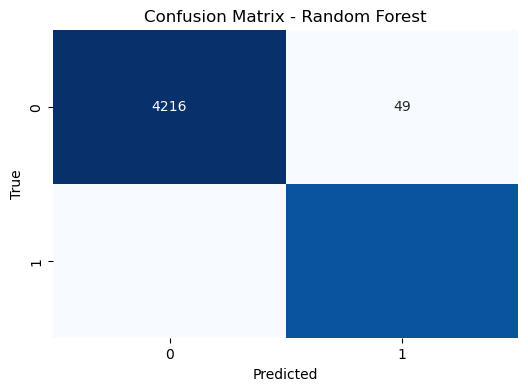

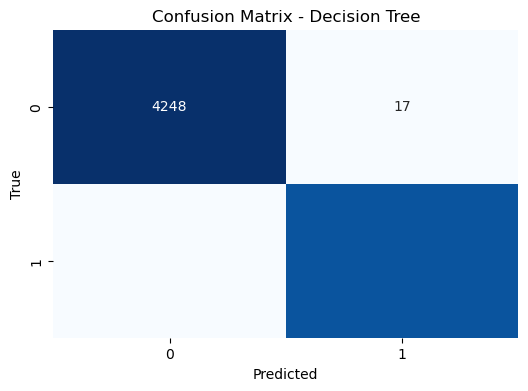

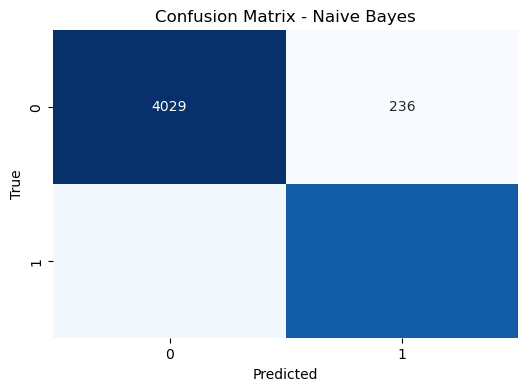

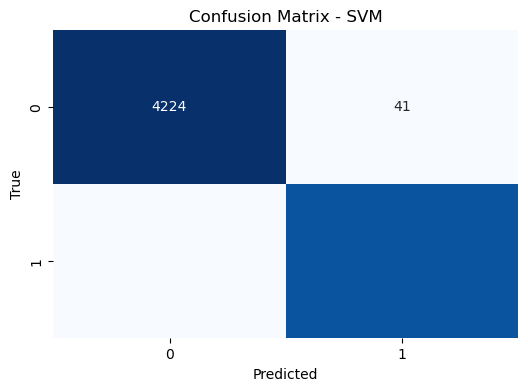

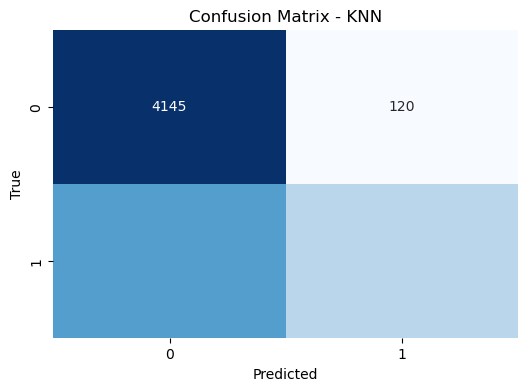

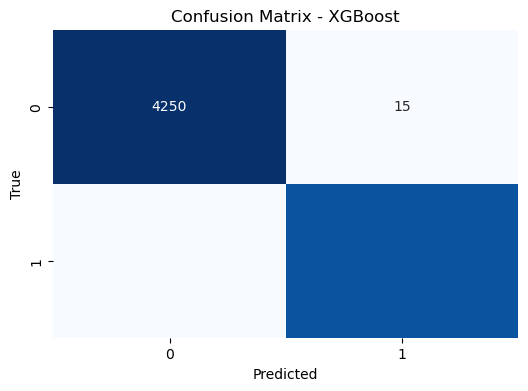

In [61]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix
cm_knn = confusion_matrix(y_test, pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


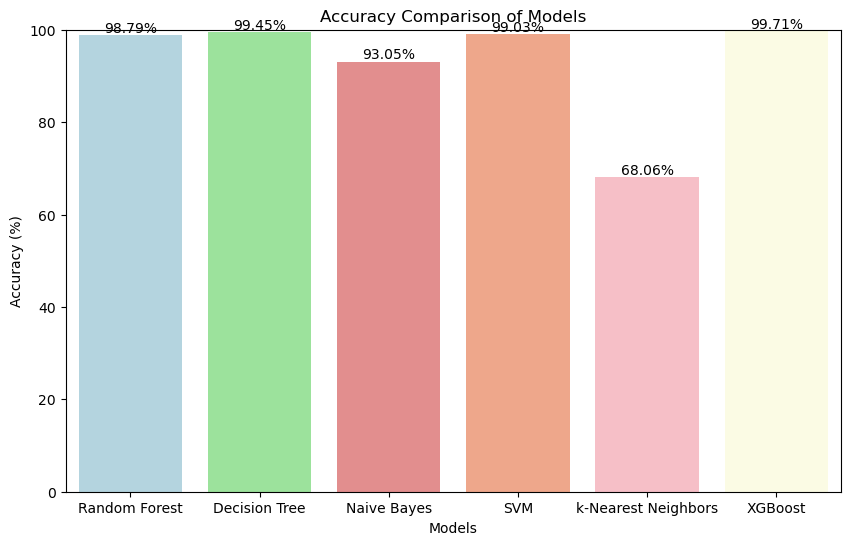

In [62]:
# Bar plot for Accuracy Comparison
models = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'SVM', 'k-Nearest Neighbors', 'XGBoost']
accuracies = [RF.score(xv_test, y_test)*100, DT.score(xv_test, y_test)*100, NB.score(xv_test, y_test)*100, SVM.score(xv_test, y_test)*100, KNN.score(xv_test, y_test)*100, XGB.score(xv_test, y_test)*100]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightyellow']

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette=colors)
plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Adjusted to 100 for accuracy percentage
for index, value in enumerate(accuracies):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')
plt.show()
